In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# df = pd.read_csv('data/2018-bis-2022.csv')
# df = pd.read_csv('data/2019-bis-2023.csv')
# df = pd.read_csv('data/2020-bis-2024.csv')
df = pd.read_csv('data/2021-bis-2025.csv')
df.head()

,Student ID,b-o-1-e-1,p-o-1-e-2,p-o-1-e-3,b-o-1-e-4,b-o-1-z-5,p-o-1-z-6,p-o-1-z-7,b-o-1-z-8,b-o-2-e-1,...,p-o-7-e-3,p-o-7-z-4,p-f-7-z-5,p-f-7-z-6,p-f-7-z-7,p-o-8-z-1,b-f-8-z-2,p-o-8-e-3,p-f-8-e-4,p-o-8-p-5
0,ac21x-01,90,100,95,75,85.0,100,90,85.0,100.0,...,60,75,65,75,90,89.0,74.0,75.0,70.0,90.0
1,ac21x-02,100,100,92,100,100.0,100,95,85.0,100.0,...,60,60,100,60,75,60.0,60.0,60.0,60.0,90.0
2,ac21x-03,100,100,94,100,100.0,100,100,94.5,98.0,...,90,90,100,80,100,97.0,90.0,100.0,90.0,100.0
3,ac21x-04,100,100,91,90,95.0,100,100,100.0,98.0,...,93,85,100,93,100,88.0,82.0,90.0,91.0,100.0
4,ac21x-05,100,100,90,75,100.0,95,96,85.0,100.0,...,98,100,100,97,100,93.0,78.0,100.0,94.0,100.0


C:\Users\VIRA~1.LIU\AppData\Local\Temp/ipykernel_19016/105178763.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['avg_score'] = df.mean(axis=1)


<AxesSubplot:xlabel='avg_score', ylabel='Count'>

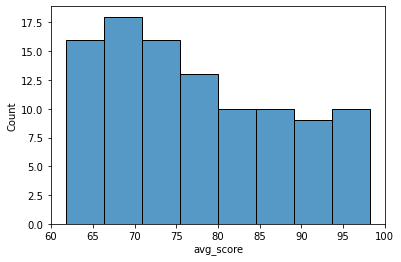

In [5]:
df['avg_score'] = df.mean(axis=1)
sns.histplot(df['avg_score'])

In [6]:
conditions = [
    df['avg_score'] >= 90,
    (df['avg_score'] >= 75) & (df['avg_score'] < 90),
    df['avg_score'] < 75
]
choices = ['excellent', 'good', 'enough']

df['performance'] = np.select(conditions, choices)

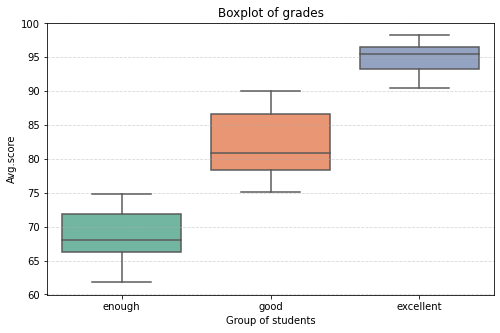

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='performance', y='avg_score', palette='Set2', order=['enough', 'good', 'excellent'])
plt.title('Boxplot of grades')
plt.xlabel('Group of students')
plt.ylabel('Avg.score')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [8]:
df.drop(['Student ID', 'avg_score', 'performance'], axis=1, inplace=True)
df.head()

,b-o-1-e-1,p-o-1-e-2,p-o-1-e-3,b-o-1-e-4,b-o-1-z-5,p-o-1-z-6,p-o-1-z-7,b-o-1-z-8,b-o-2-e-1,b-o-2-e-2,...,p-o-7-e-3,p-o-7-z-4,p-f-7-z-5,p-f-7-z-6,p-f-7-z-7,p-o-8-z-1,b-f-8-z-2,p-o-8-e-3,p-f-8-e-4,p-o-8-p-5
0,90,100,95,75,85.0,100,90,85.0,100.0,60,...,60,75,65,75,90,89.0,74.0,75.0,70.0,90.0
1,100,100,92,100,100.0,100,95,85.0,100.0,80,...,60,60,100,60,75,60.0,60.0,60.0,60.0,90.0
2,100,100,94,100,100.0,100,100,94.5,98.0,95,...,90,90,100,80,100,97.0,90.0,100.0,90.0,100.0
3,100,100,91,90,95.0,100,100,100.0,98.0,75,...,93,85,100,93,100,88.0,82.0,90.0,91.0,100.0
4,100,100,90,75,100.0,95,96,85.0,100.0,90,...,98,100,100,97,100,93.0,78.0,100.0,94.0,100.0


In [9]:
# Mask of low grades (< 75)
low_mask = df < 75

# The counter of low grades
low_counts = low_mask.sum()

# Total number of the grades
total_counts = df.count()

# The part of low grades
low_share = low_counts / total_counts

# Result
print(low_share.sort_values(ascending=False).head())

b-o-3-z-1    0.754902
b-f-8-z-2    0.735294
p-o-7-e-2    0.725490
p-f-4-e-4    0.676471
p-o-6-e-1    0.676471
dtype: float64
